In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv('Example.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


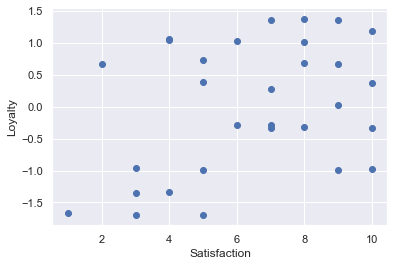

In [3]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [4]:
x=data.copy()

In [5]:
kmeans=KMeans(2)

In [6]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
cluster=x.copy()

In [8]:
cluster['cluster']=kmeans.fit_predict(x)
cluster

,Satisfaction,Loyalty,cluster
0,4,-1.33,0
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,0
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


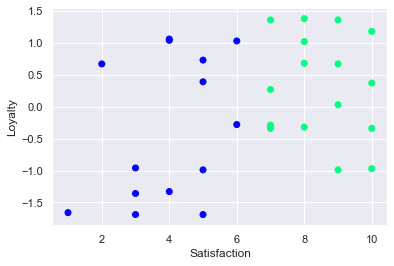

In [9]:
plt.scatter(cluster['Satisfaction'],cluster['Loyalty'],c=cluster['cluster'],cmap='winter')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

# Standardize the  variables

In [10]:
from sklearn import preprocessing

In [12]:
x_scaled=preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [17]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

In [18]:
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.586212092192188,
 5.453683468776063,
 4.315662464700005,
 3.8217266114312567]

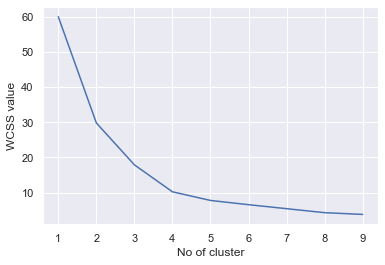

In [19]:
plt.plot(range(1,10),wcss)
plt.xlabel('No of cluster')
plt.ylabel('WCSS value')
plt.show()

In [29]:
kmeans_new=KMeans(4)
scaled_data=x.copy()
kmeans_new.fit(x_scaled)
scaled_data['cluster']=kmeans_new.fit_predict(x_scaled)
scaled_data

,Satisfaction,Loyalty,cluster
0,4,-1.33,2
1,6,-0.28,1
2,5,-0.99,2
3,7,-0.29,1
4,4,1.06,0
5,1,-1.66,2
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,3
9,8,0.68,3


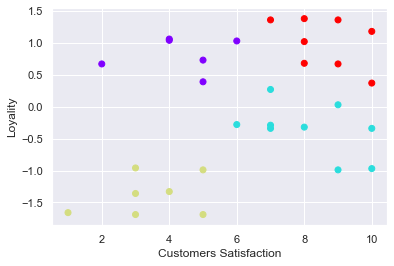

In [30]:
plt.scatter(scaled_data['Satisfaction'],scaled_data['Loyalty'],c=scaled_data['cluster'],cmap='rainbow')
plt.xlabel('Customers Satisfaction')
plt.ylabel('Loyality')
plt.show()